# NAME SHOAIB FAROOQ

# REG# 21I-2278

# CLASS MS(DS)

# Libraries

In [7]:
#for work with numpy arrays
import numpy as np
#for work with dataframs
import pandas as pd
#for draw chats and graphs
import seaborn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#for ploating
import plotly as py
import plotly.graph_objs as go

# Data Loading

In [3]:
#Load data from memory to program
Data = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A4/diabetes.csv")
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check number of empty spaes
print(Data.isnull().sum())
#check for na values
print(Data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# HEAT MAP

## Data Prepration

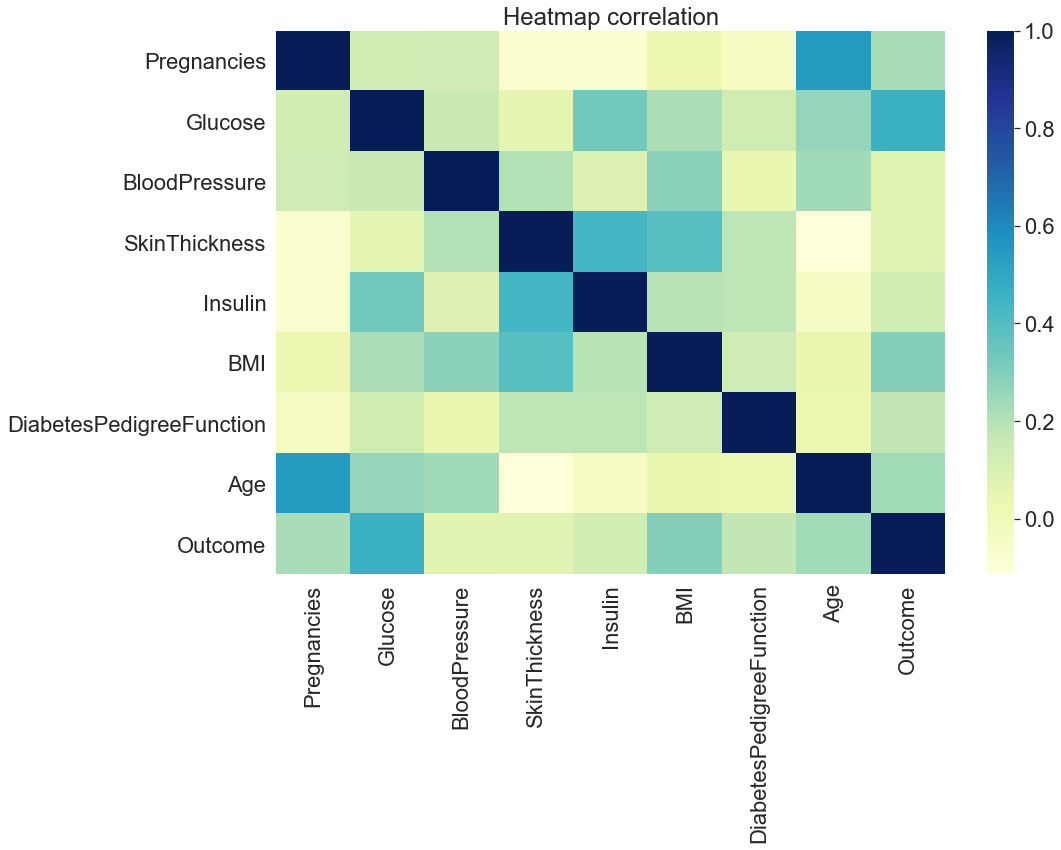

In [8]:
Data_corr = Data.corr() # Calculation of the correlation coefficients in pairs, with the default method:
plt.figure(figsize=(15,10))
seaborn.heatmap(Data_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### Above map shown that all features are importent for the disease  prediction

# DATA SPLITING

In [9]:
#for spliting data into training and testing
from sklearn.model_selection import train_test_split
#our target column of outcomes
Y=Data['Outcome']
#features for tranining
X=Data.drop('Outcome',axis=1)
#spliting of data into tranining and testing
x_train,x_test,y_train,y_test=train_test_split(X , Y , train_size=0.8,test_size=0.2)

# SVM MODEL

In [10]:
# Creating the SVM model.
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
#for testing
y_pred = model.predict(x_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 79.22077922077922


array([[96,  7],
       [25, 26]], dtype=int64)

# APPLY PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
StandardScaler = StandardScaler()
#Standarization of data
x_train1 = StandardScaler.fit_transform(x_train)
x_test1 = StandardScaler.fit_transform(x_test)

In [13]:
x_train.shape

(614, 8)

In [14]:
#if we reduce 50% of features 
pca_component = decomposition.PCA(n_components=4)

In [15]:
#train feature in PCA
X_train_PCA = pca_component.fit_transform(x_train1)
X_test_PCA = pca_component.fit_transform(x_test1)

In [16]:
X_train_PCA.shape

(614, 4)

In [17]:
X_test_PCA.shape

(154, 4)

# APPLY SVM AFTER PCA

In [18]:
model1 = svm.SVC(kernel='rbf')
model1.fit(X_train_PCA,y_train)
#for testing
y_pred = model1.predict(X_test_PCA)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

Accuracy: 51.298701298701296


array([[71, 32],
       [43,  8]], dtype=int64)

### Conclusion accuracy reduced after applying PCA means all features must be important to get a maximum prediction of disease